In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.1 MB 8.8 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 38.2 MB/s 
     |████████████████████████████████| 271 kB 39.1 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [ ]:
API_key = 'OFYE21323O0HHV4I'

In [ ]:
ts = TimeSeries(key = API_key,output_format='pandas')
data, meta = ts.get_intraday('MSFT', interval = '5min' , outputsize = 'full')

In [ ]:
meta

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2022-02-18 20:00:00',
 '4. Interval': '5min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [ ]:
data = data.reset_index()

In [ ]:
data

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-02-18 20:00:00,285.7800,285.8500,285.7000,285.8000,8385.0
1,2022-02-18 19:55:00,285.8000,285.8500,285.8000,285.8500,2682.0
2,2022-02-18 19:50:00,285.8000,285.8500,285.8000,285.8500,2008.0
3,2022-02-18 19:40:00,285.7500,285.7500,285.7500,285.7500,1738.0
4,2022-02-18 19:35:00,285.8000,285.8201,285.7500,285.7500,1585.0
...,...,...,...,...,...,...
3579,2022-01-24 04:25:00,297.0151,297.0650,296.4862,296.6659,3914.0
3580,2022-01-24 04:20:00,297.1349,297.2048,296.5761,296.5761,3318.0
3581,2022-01-24 04:15:00,297.7237,297.7237,297.1748,297.1748,3732.0
3582,2022-01-24 04:10:00,297.6638,297.6838,297.2946,297.6838,5498.0


In [ ]:
df = data

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date         datetime64[ns]
1. open             float64
2. high             float64
3. low              float64
4. close            float64
5. volume           float64
dtype: object

In [ ]:
df.set_index('date', inplace=True)
df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-02-18 20:00:00,285.78,285.8500,285.70,285.80,8385.0
2022-02-18 19:55:00,285.80,285.8500,285.80,285.85,2682.0
2022-02-18 19:50:00,285.80,285.8500,285.80,285.85,2008.0
2022-02-18 19:40:00,285.75,285.7500,285.75,285.75,1738.0
2022-02-18 19:35:00,285.80,285.8201,285.75,285.75,1585.0


In [ ]:
import plotly.graph_objects as go
import plotly
import pandas as pd
from datetime import datetime
df = data
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['1. open'],
                high=df['2. high'],
                low=df['3. low'],
                close=df['4. close'])])

plotly.offline.plot(fig, filename='Candlestick.html')

KeyError: ignored

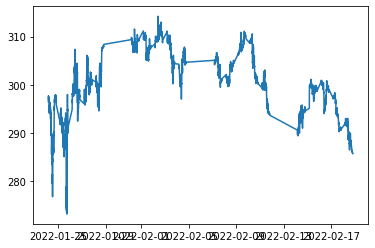

In [ ]:
plt.plot(data['1. open'])

In [ ]:
!pip install pmdarima

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = data
stock_data.head(50)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-02-18 20:00:00,285.7800,285.8500,285.7000,285.8000,8385.0
2022-02-18 19:55:00,285.8000,285.8500,285.8000,285.8500,2682.0
2022-02-18 19:50:00,285.8000,285.8500,285.8000,285.8500,2008.0
2022-02-18 19:40:00,285.7500,285.7500,285.7500,285.7500,1738.0
2022-02-18 19:35:00,285.8000,285.8201,285.7500,285.7500,1585.0
2022-02-18 19:30:00,285.7800,285.9700,285.7800,285.9700,778.0
2022-02-18 19:25:00,285.8001,285.8001,285.7100,285.7800,908.0
2022-02-18 19:20:00,285.8500,285.8800,285.7000,285.8800,1795.0
2022-02-18 19:15:00,285.9000,285.9000,285.7800,285.9000,866.0


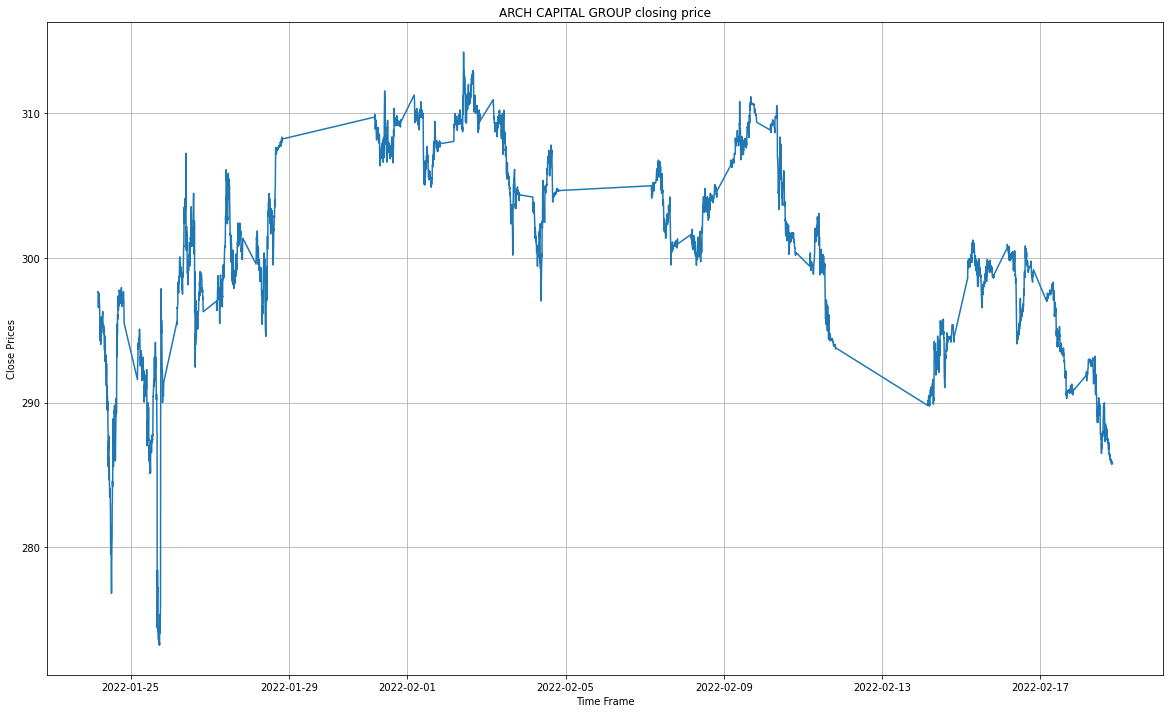

In [ ]:
#plot close price
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Time Frame')
plt.ylabel('Close Prices')
plt.plot(stock_data['4. close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

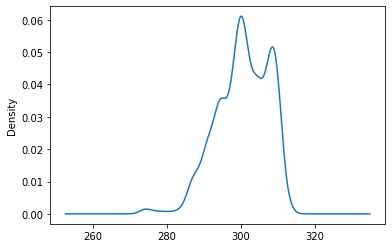

In [ ]:
#Distribution of the dataset
df_close = stock_data['4. close']
df_close.plot(kind='kde')

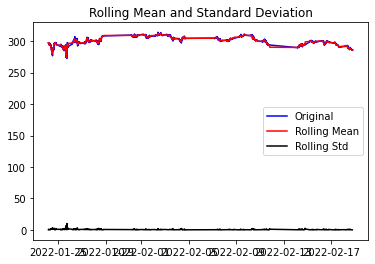

Results of dickey fuller test
Test Statistics                  -2.874560
p-value                           0.048387
No. of lags used                 27.000000
Number of observations used    3556.000000
critical value (1%)              -3.432190
critical value (5%)              -2.862353
critical value (10%)             -2.567203
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

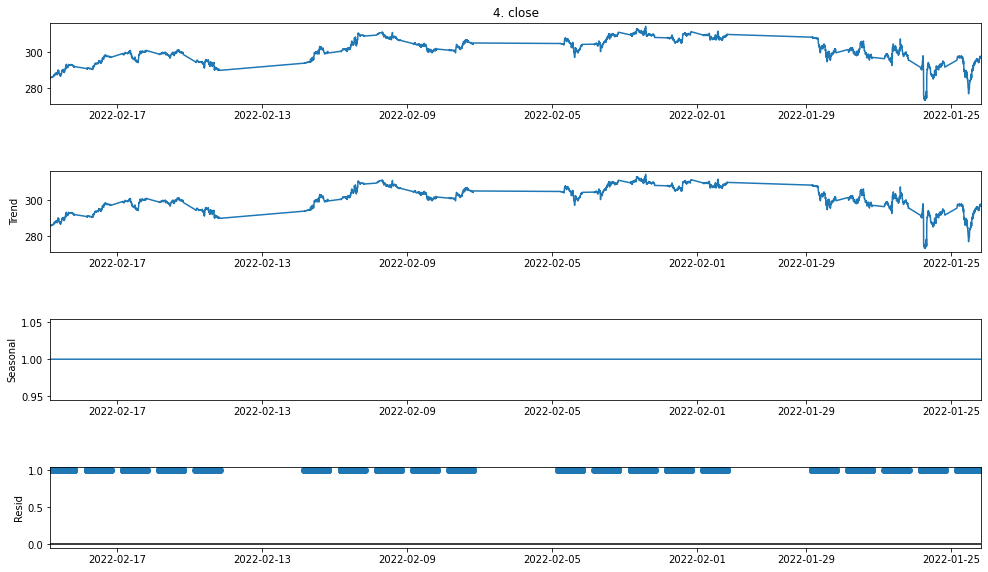

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_close, model='multiplicative', period=1)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.

No handles with labels found to put in legend.


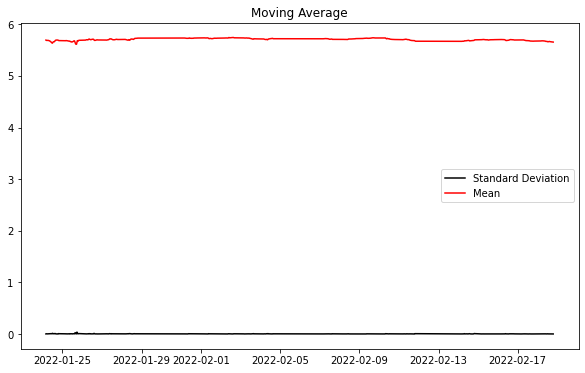

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

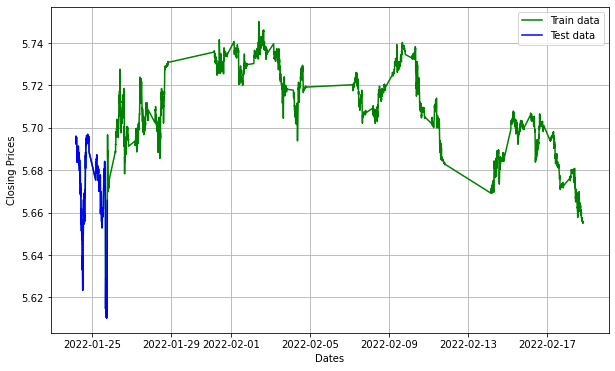

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-31508.659, Time=1.85 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-31530.429, Time=8.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31531.502, Time=5.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-31510.609, Time=0.80 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31530.241, Time=7.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31530.439, Time=9.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-31525.010, Time=2.59 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31533.436, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-31532.174, Time=1.49 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-31532.370, Time=2.96 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-31532.365, Time=0.81 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-31526.971, Time=1.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 44.110 seconds
                               SARIMAX Results                 

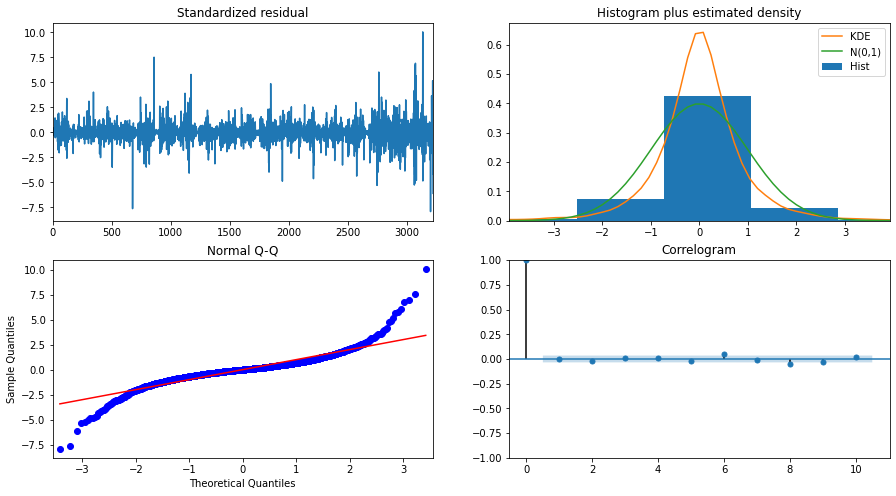

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(train_data, order=(0,1,1))

result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               4. close   No. Observations:                 3222
Model:                 ARIMA(0, 1, 1)   Log Likelihood               15768.718
Date:                Mon, 21 Feb 2022   AIC                         -31533.436
Time:                        15:38:55   BIC                         -31521.282
Sample:                             0   HQIC                        -31529.080
                               - 3222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0884      0.010     -9.065      0.000      -0.108      -0.069
sigma2      3.275e-06   3.09e-08    105.815      0.000    3.21e-06    3.34e-06
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
fc = result.forecast(len(test_data), alpha=0.05)  # 95% conf
se = result.forecast(len(test_data), alpha=0.05)
conf = result.forecast(len(test_data), alpha=0.05)


In [ ]:
fc.tail()

3576    5.679112
3577    5.679112
3578    5.679112
3579    5.679112
3580    5.679112
Name: predicted_mean, dtype: float64

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

KeyError: ignored

In [ ]:
result.dtype

AttributeError: ignored